In [1]:
import pandas as pd

In [114]:
data = pd.read_csv("/Users/nali/jupyter/parallel_corpus.csv")
data.describe()
data.loc[data['lineCmp']>3,'label']=0

In [116]:
data.describe()
label0 = data[data['label']==0]
print(len(label0))
label1 = data[data['label']==1]
label1 = label1.sample(n=2000)
# print(train.sample(n=2000).describe())

1223


In [117]:
data[data['lineCmp']>3].head()

,urlPattern,lineCmp,sameLineCmp,charCmp,wordCmp,label
784,2,3.456140,0.002030,5.892069,3.820975,0
788,2,3.547401,0.005172,6.148670,3.910811,0
792,2,16.592308,0.002782,26.564680,16.110887,0
816,2,6.288462,0.018349,8.788553,5.079498,0
817,2,3.249651,0.002575,5.634932,3.594154,0


In [118]:
data = label0.append(label1)
print(len(data))
y = data['label']
X = data.loc[:,['lineCmp', 'sameLineCmp', 'charCmp', 'wordCmp'] ]
X.describe()

3223


,lineCmp,sameLineCmp,charCmp,wordCmp
count,3223.000000,3223.000000,3223.000000,3223.000000
mean,2.272291,0.017668,4.923399,2.562620
std,4.113770,0.050225,7.068493,3.632541
min,0.038660,0.000000,0.103243,0.069972
25%,0.976399,0.000000,1.636082,0.981949
50%,1.081967,0.002567,2.217840,1.095609
75%,1.999578,0.004866,4.393106,2.295863
max,55.000000,1.000000,75.641935,32.203488


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import cross_validation

/Users/nali/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [119]:
clf = DecisionTreeClassifier(max_depth=4)
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, y, test_size=0.25, random_state=0)
# X = [[0, 0], [1, 1],[0,1],[1,0]]
# y = [0, 1, 1, 0]
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [121]:
clf.score(X_test,Y_test)

0.98263027295285355

In [67]:
clf.predict([[0.7204301075268817,0.0,1.263157894736842,0.543509272467903]])

array([0])

In [68]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

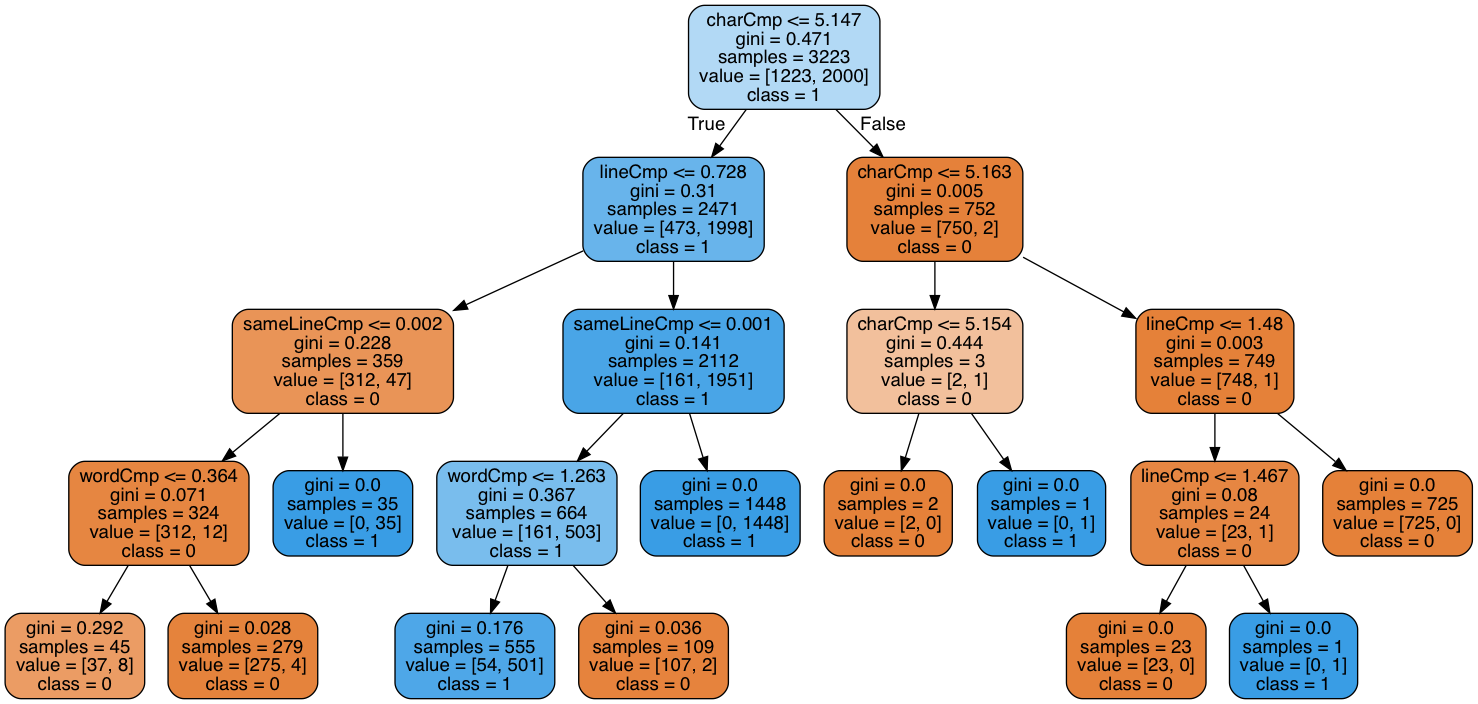

In [120]:
from sklearn.datasets import load_iris
from sklearn import tree
import sys
import os 
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=['lineCmp', 'sameLineCmp', 'charCmp', 'wordCmp'],
                         class_names=['0', '1'],  
                         filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 


# iris.target_names

In [78]:
from sklearn.datasets import load_iris
from sklearn import tree
import sys
import os

iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

In [83]:
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("iris.pdf")

True

In [84]:
pwd（）

'/Users/nali/jupyter/ParallelCorpus'